In [1]:
import json
import math
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2


In [22]:
df = pd.read_csv("../keypoints/andy_keypoints.csv")
df.head()

,frame,0_x,0_y,0_z,0_visibility,1_x,1_y,1_z,1_visibility,2_x,...,30_z,30_visibility,31_x,31_y,31_z,31_visibility,32_x,32_y,32_z,32_visibility
0,0,0.428061,0.288042,-0.701593,0.999917,0.434253,0.281639,-0.666347,0.999843,0.439950,...,0.441719,0.864795,0.470754,0.740233,0.210750,0.972560,0.371737,0.722967,0.217837,0.976145
1,1,0.425929,0.287448,-0.649534,0.999922,0.432823,0.280873,-0.616262,0.999852,0.438568,...,0.441714,0.864328,0.471212,0.741048,0.098273,0.973420,0.371683,0.727241,0.219726,0.976355
2,2,0.425145,0.286684,-0.623965,0.999926,0.432485,0.280126,-0.591635,0.999860,0.438269,...,0.400004,0.863477,0.472254,0.743809,0.069076,0.974382,0.371604,0.733607,0.180891,0.976597
3,3,0.425010,0.286094,-0.625544,0.999929,0.432442,0.279638,-0.593035,0.999867,0.438224,...,0.396381,0.859454,0.472261,0.743693,0.026208,0.974667,0.371645,0.732619,0.180869,0.975818
4,4,0.425029,0.285669,-0.623941,0.999934,0.432473,0.279311,-0.592621,0.999875,0.438246,...,0.405191,0.857400,0.471432,0.744112,-0.010225,0.975195,0.370497,0.729227,0.209705,0.975349


In [27]:
columns = []  # Start with frame column
indices = np.concatenate([np.array([0]), np.arange(12, 21), np.arange(24, 33)])
for i in indices:
    columns.extend([f'{i}_x', f'{i}_y', f'{i}_z'])

# Prepare the dataset with selected columns
filtered_df = df[columns]
filtered_df.iloc[1]

0_x     0.425929
0_y     0.287448
0_z    -0.649534
12_x    0.366536
12_y    0.326957
12_z   -0.404025
13_x    0.524338
13_y    0.260071
13_z   -0.450854
14_x    0.335904
14_y    0.259069
14_z   -0.659069
15_x    0.554158
15_y    0.190294
15_z   -0.554305
16_x    0.310989
16_y    0.191497
16_z   -0.885050
17_x    0.565373
17_y    0.177278
17_z   -0.608846
18_x    0.302692
18_y    0.179725
18_z   -0.963429
19_x    0.551983
19_y    0.176427
19_z   -0.616077
20_x    0.316328
20_y    0.177240
20_z   -0.959813
24_x    0.381685
24_y    0.475182
24_z   -0.013025
25_x    0.471093
25_y    0.578196
25_z    0.093131
26_x    0.381696
26_y    0.575075
26_z    0.100936
27_x    0.473845
27_y    0.687473
27_z    0.342729
28_x    0.376217
28_y    0.676673
28_z    0.420532
29_x    0.461989
29_y    0.698267
29_z    0.353193
30_x    0.385295
30_y    0.687277
30_z    0.441714
31_x    0.471212
31_y    0.741048
31_z    0.098273
32_x    0.371683
32_y    0.727241
32_z    0.219726
Name: 1, dtype: float64

In [21]:
indices = np.concatenate([np.array([0, 1, 2,]), np.arange(12, 20)*4, np.arange(12, 20)*4 +1, np.arange(24, 32)*4]) + 1
data.iloc[:, indices].head()



,0_x,0_y,0_z,12_x,13_x,14_x,15_x,16_x,17_x,18_x,...,18_y,19_y,24_x,25_x,26_x,27_x,28_x,29_x,30_x,31_x
0,0.428061,0.288042,-0.701593,0.366477,0.525112,0.335954,0.554497,0.311140,0.565437,0.302605,...,0.179726,0.176449,0.381779,0.470930,0.379611,0.472946,0.376256,0.461567,0.385711,0.470754
1,0.425929,0.287448,-0.649534,0.366536,0.524338,0.335904,0.554158,0.310989,0.565373,0.302692,...,0.179725,0.176427,0.381685,0.471093,0.381696,0.473845,0.376217,0.461989,0.385295,0.471212
2,0.425145,0.286684,-0.623965,0.366731,0.524183,0.335900,0.554148,0.310945,0.565374,0.302848,...,0.179708,0.176426,0.381627,0.471524,0.381791,0.475555,0.376212,0.463108,0.385210,0.472254
3,0.425010,0.286094,-0.625544,0.366882,0.524240,0.335930,0.554215,0.310705,0.565417,0.302850,...,0.179614,0.176421,0.381583,0.472167,0.381559,0.476167,0.376063,0.463606,0.384647,0.472261
4,0.425029,0.285669,-0.623941,0.366850,0.524905,0.335716,0.554833,0.310217,0.565918,0.302648,...,0.179164,0.176350,0.381216,0.471927,0.381283,0.477047,0.376049,0.464324,0.384423,0.471432


In [3]:
with open("points-andy.json", "r", encoding="utf-8") as file:
    data = json.load(file)

for i, val in enumerate(data):
    list = []
    for key in val:
        list.append(val[key])
    data[i] = list

np_data = np.array(data)
np_data.shape

(414, 33, 2)

# Display

In [3]:
path = "../videos/WhatsApp Video 2024-04-24 at 19.56.05.mp4"
cap = cv2.VideoCapture(path)
# go to 1000th frame
cap.set(1, 100)
up = False
counter = 0
print("loaded")
while True:
    success, img = cap.read()
    print(img.shape)
    cv2.imshow("img", img)
    key = cv2.waitKey(0)
    if key == ord("q"):
        print("Quitting")
        #close the window
        break
cv2.waitKey(1)
cv2.destroyAllWindows()
cap.release()


loaded
(1280, 720, 3)


# Autocorrelation

In [47]:
## discard not useful point and merge x,y
indices = np.concatenate([np.array([0]), np.arange(12, 20), np.arange(24, 32)])
np_data_useful = np_data[:, indices, :]
np_data_reshapes =  np_data_useful.reshape(np_data_useful.shape[0], -1)
ts = pd.DataFrame(np_data_reshapes)
#and keep only every other point
ts = ts.iloc[::2, :]
print(ts.shape)

(207, 34)


In [48]:
def compute_autocorr_matrix(ts, max_lag, win_lenght):
    print("compute_autocorr_matrix", ts.shape, max_lag)
    n = ts.shape[1]  # number of components
    autocorr_matrices = []

    for lag in range(max_lag + 1):
        print("lag", lag)
        autocorr_matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                autocorr_matrix[i, j] = (
                    ts.iloc[:, i].corr(ts.iloc[:, j].shift(lag)[:(lag+win_lenght)])
                    # ts.iloc[:, i].autocorr(lag=lag)
                    # if i == j
                    # else ts.iloc[:, i].corr(ts.iloc[:, j].shift(lag))
                )
        autocorr_matrices.append(autocorr_matrix)

    return autocorr_matrices


def plot_autocorr_matrices(autocorr_matrices, max_lag):
    fig, axes = plt.subplots(1, max_lag + 1, figsize=(5 * (max_lag + 1), 5))
    for lag, ax in enumerate(axes):
        cax = ax.matshow(autocorr_matrices[lag], cmap="coolwarm")
        ax.set_title(f"Lag {lag}")
        fig.colorbar(cax, ax=ax)

    plt.show()


def plot_autocorr(autocorr_matrices, max_lag):
    n = ts.shape[1]  # number of components
    fig, ax = plt.subplots(figsize=(20, 5))
    for i in range(n):
        ax.plot(
            range(max_lag + 1),
            [autocorr_matrices[lag][i, i] for lag in range(max_lag + 1)],
        )
    ax.set_xlabel("Lag")
    ax.set_ylabel("Autocorrelation")
    plt.tight_layout()
    plt.show()


def plot_autocorr_sum(abs_autocorr_matrices, max_lag):
    n = ts.shape[1]  # number of components
    fig, ax = plt.subplots(figsize=(20, 5))
    ax.plot(
        range(max_lag + 1),
        [np.sum(autocorr_matrices[lag]) for lag in range(max_lag + 1)],
    )
    ax.set_title("Sum of autocorrelation")
    ax.set_xlabel("Lag")
    ax.set_ylabel("Sum of autocorrelation")
    plt.tight_layout()
    plt.show()

In [50]:

max_lag = 100
start = 10
win_length = 40
if (ts.shape[0] - start) < win_length + max_lag:
    print("Window length is too long:", win_length, "for the given start index:", start, "and max lag:", max_lag, "with the time series length:", ts.shape[0])
else:
  autocorr_matrices = compute_autocorr_matrix(ts[start:], max_lag, win_length)

compute_autocorr_matrix (197, 34) 100
lag 0
lag 1
lag 2
lag 3
lag 4
lag 5
lag 6
lag 7
lag 8
lag 9
lag 10
lag 11
lag 12
lag 13
lag 14
lag 15
lag 16
lag 17
lag 18
lag 19
lag 20
lag 21
lag 22
lag 23
lag 24
lag 25
lag 26
lag 27
lag 28
lag 29
lag 30
lag 31
lag 32
lag 33
lag 34
lag 35
lag 36
lag 37
lag 38
lag 39
lag 40
lag 41
lag 42
lag 43
lag 44
lag 45
lag 46
lag 47
lag 48
lag 49
lag 50
lag 51
lag 52
lag 53
lag 54
lag 55
lag 56
lag 57
lag 58
lag 59
lag 60
lag 61
lag 62
lag 63
lag 64
lag 65
lag 66
lag 67
lag 68
lag 69
lag 70
lag 71
lag 72
lag 73
lag 74
lag 75
lag 76
lag 77
lag 78
lag 79
lag 80
lag 81
lag 82
lag 83
lag 84
lag 85
lag 86
lag 87
lag 88
lag 89
lag 90
lag 91
lag 92
lag 93
lag 94
lag 95
lag 96
lag 97
lag 98
lag 99
lag 100


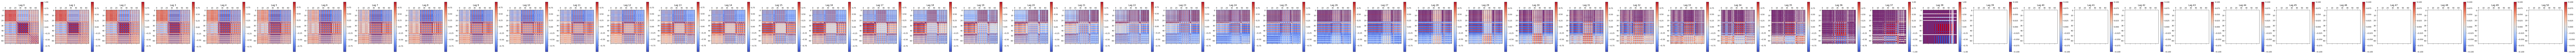

In [30]:
plot_autocorr_matrices(autocorr_matrices, max_lag)


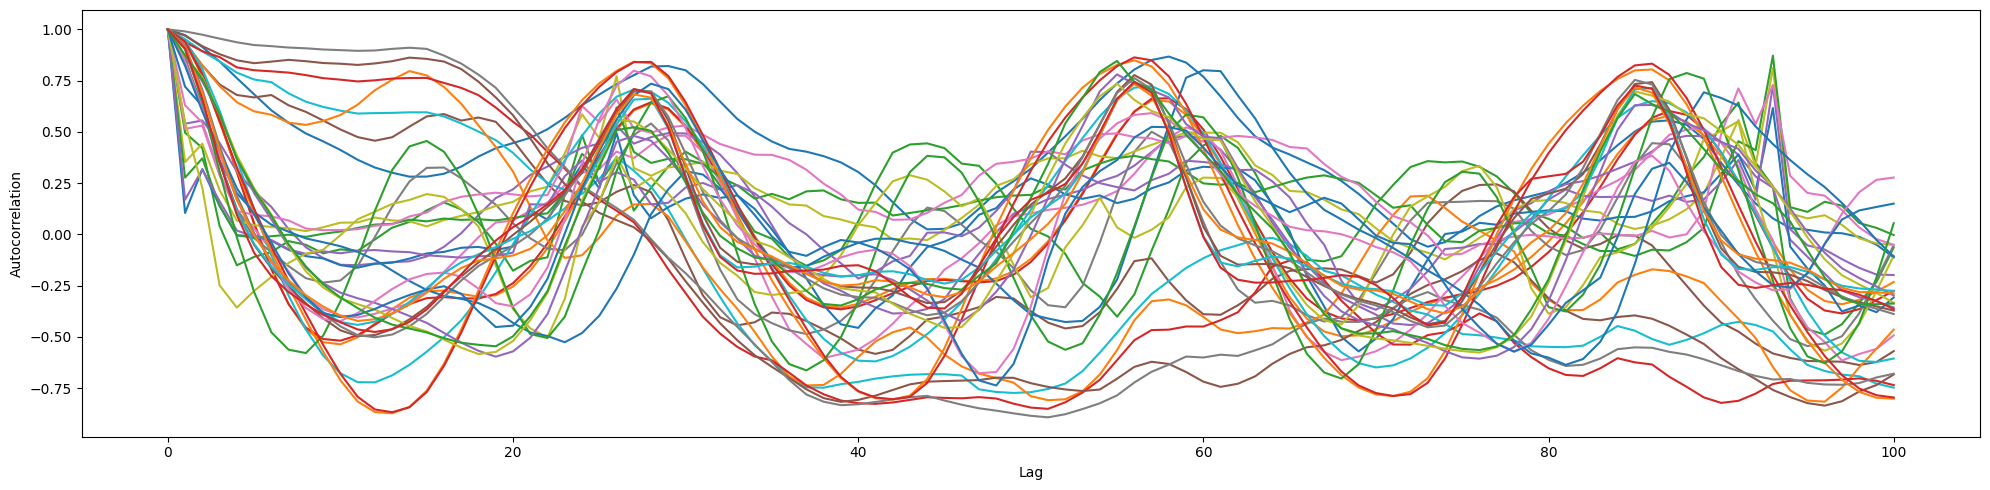

In [51]:
plot_autocorr(autocorr_matrices, max_lag)

In [ ]:
plot_autocorr_sum(autocorr_matrices, max_lag)

# Spectral Density

In [ ]:
a = []
for k in range(1, 5*20):
  a.append(math.sin(2*np.pi*k/20))
a = pd.DataFrame(a)

In [ ]:
#plot a
plt.plot(a)

In [ ]:
ax=[]
for lag in range(1, 50):
  ax.append(a.iloc[0:40, 0].autocorr(lag=lag))
ax = pd.DataFrame(ax)
ax_fft = np.fft.rfft(a)

In [ ]:
plt.plot(ax)

In [ ]:
plt.plot(ax_fft)